### Linear Regression

##### 1. Import Libraries 

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

##### 2. Load Dataset

In [31]:
df = pd.read_csv("Ecommerce Customers.txt")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497,12.656,39.578,4.083,587.951
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926,11.109,37.269,2.664,392.205
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.001,11.330,37.111,4.105,487.548
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.306,13.718,36.721,3.120,581.852
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.331,12.795,37.537,4.446,599.406


##### 3. EDA

In [32]:
df.shape

(500, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [34]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000,500.000,500.000,500.000,500.000
mean,33.053,12.052,37.060,3.533,499.314
std,0.993,0.994,1.010,0.999,79.315
min,29.532,8.508,33.914,0.270,256.671
25%,32.342,11.388,36.349,2.930,445.038
50%,33.082,11.983,37.069,3.534,498.888
75%,33.712,12.754,37.716,4.127,549.314
max,36.140,15.127,40.005,6.923,765.518


In [35]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000,-0.028,-0.035,0.060,0.355
Time on App,-0.028,1.000,0.082,0.029,0.499
Time on Website,-0.035,0.082,1.000,-0.048,-0.003
Length of Membership,0.060,0.029,-0.048,1.000,0.809
Yearly Amount Spent,0.355,0.499,-0.003,0.809,1.000


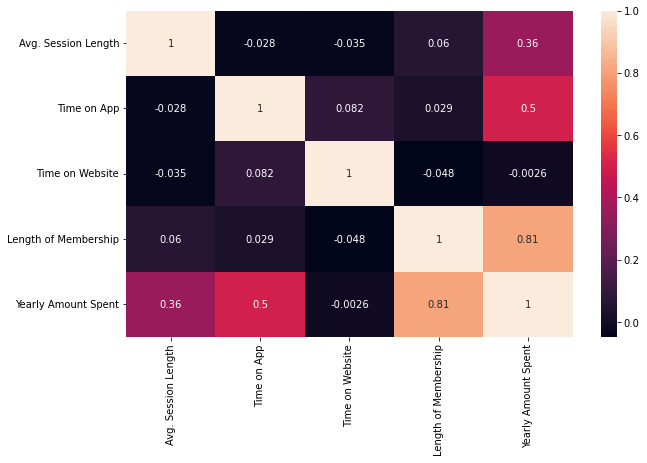

In [36]:
sns.heatmap(df.corr(), annot=True);

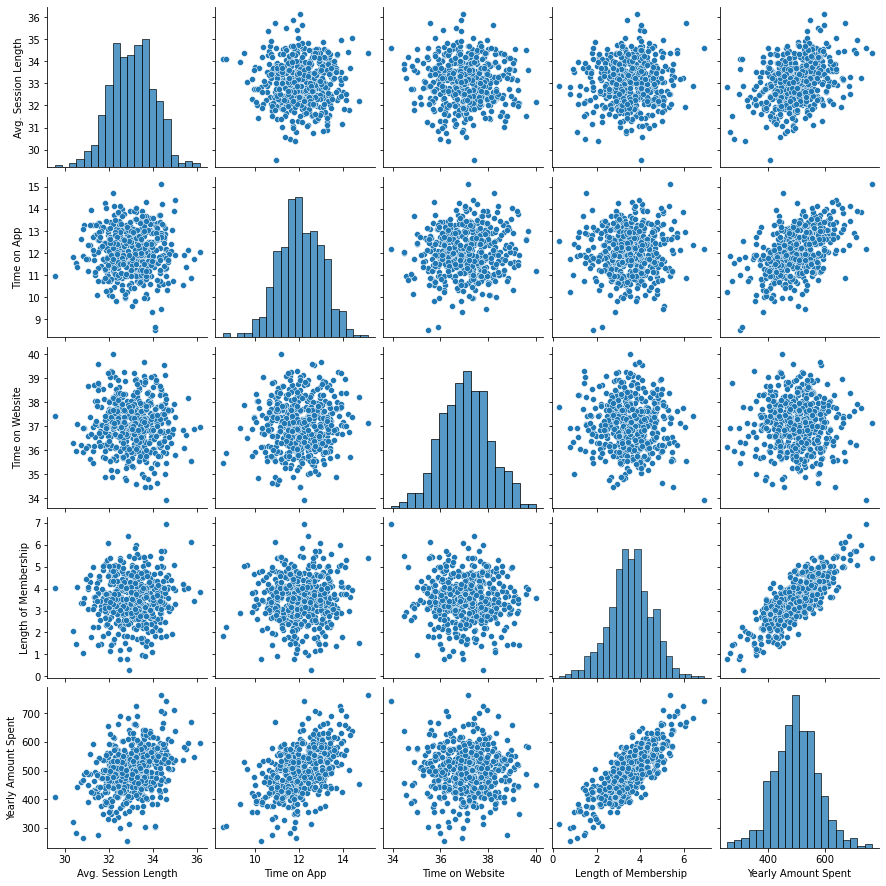

In [37]:
sns.pairplot(df);

##### 4. Training and Testing Data

In [38]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [39]:
df.columns[3:-1]
# These are independent variables(X)

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [40]:
X = df[df.columns[3:-1]]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497,12.656,39.578,4.083
1,31.926,11.109,37.269,2.664
2,33.001,11.330,37.111,4.105
3,34.306,13.718,36.721,3.120
4,33.331,12.795,37.537,4.446


In [48]:
y = df["Yearly Amount Spent"]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### 5. Training The Model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

##### 6. Predicting Test Data

In [53]:
y_pred = model.predict(X_test)

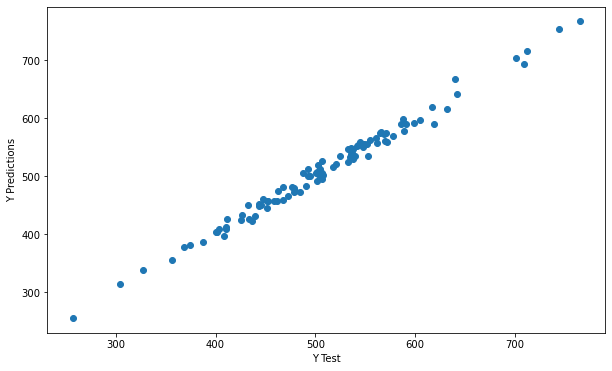

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y Test")
plt.ylabel("Y Predictions");

##### 7. Evaluating The Model

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    R2_score = r2_score(actual, pred)
    print("Model Testing Performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [57]:
eval_metrics(y_test, y_pred)

Model Testing Performance:
--------------------------
R2_score 	: 0.9881661299145553
MAE 		: 7.758907540457861
MSE 		: 91.82335857016915
RMSE 		: 9.582450551407462


In [61]:
spent_mean = df["Yearly Amount Spent"].mean()
mae = mean_absolute_error(y_test, y_pred)
mae / spent_mean
# It is useful to look at the errors superficially.
# Hatamız %0'a yakın çıktı.

0.015539133583181135

In [62]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse / spent_mean
# Burda da hatamız %0'a yakın çıktı.
# THE CLOSE RMSE AND MSE SCORES SHOW THAT OUR MODEL IS A GOOD ONE.

0.01919123000191872

In [58]:
y_train_pred = model.predict(X_train)

In [59]:
eval_metrics(y_train, y_train_pred)

Model Testing Performance:
--------------------------
R2_score 	: 0.9829214010726764
MAE 		: 7.930920557925416
MSE 		: 100.37547366830276
RMSE 		: 10.01875609386229


In [ ]:
# Train score' ları ile Test score'ları arasında da çok bir fark gözükmüyor.
# Yani overfitting veya underfitting yok gibi...

### Check The Assumptions

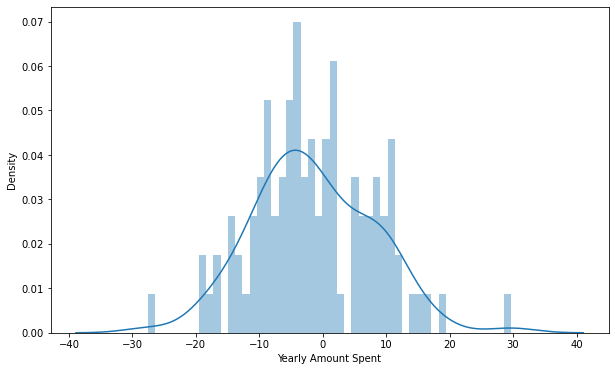

In [63]:
sns.distplot((y_test - y_pred), bins = 50); # Residual = y_test - y_pred

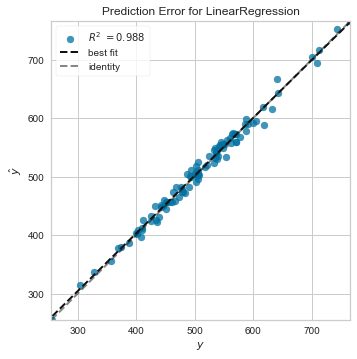

In [68]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();